## Load Library 

In [7]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from aeon.benchmarking import plot_critical_difference
from aeon.benchmarking.results_loaders import get_estimator_results_as_array
from aeon.benchmarking.results_plotting import plot_boxplot_median, plot_scatter

## Load The Results

In [3]:
# get dataset's names from 'datasets' folder
subfolders = [os.path.split(f.path)[-1] for f in os.scandir('datasets') if f.is_dir()]

df = pd.DataFrame()
for name in subfolders:
    df = pd.concat([df, pd.read_excel(f'results/{name}_output.xlsx')], ignore_index=True)
df.head()

,Dataset,n_bins,window_size,Acc
0,BeetleFly,5,2,0.50
1,BeetleFly,5,3,0.50
2,BeetleFly,5,5,0.50
3,BeetleFly,5,7,0.90
4,BeetleFly,5,8,0.85


## HeatMap

In [58]:
# Datasets
selected_dataset = ["BeetleFly","BirdChicken","Coffee","DistalPhalanxTW","ECG200","FiftyWords","FordA",
                    "LargeKitchenAppliances","Meat","MiddlePhalanxOutlineCorrect","MoteStrain","Plane","ShapeletSim",
                    "Trace","Worms"]

fig, axs = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True, figsize=(7, 10), dpi=1200)
cbar_ax = fig.add_axes([.91, .3, .02, .4])
s = 0
for i in range(5):
    for j in range(3):
        table = pd.pivot_table(df[df["Dataset"] == selected_dataset[s]], values='Acc',  
                        index='n_bins', columns='window_size')
        sns.heatmap(table, fmt="d", cmap='autumn', ax=axs[i,j], cbar= s == 0, vmin=0, vmax=1, 
                    cbar_ax=None if s else cbar_ax)
        axs[i,j].set(xlabel='word length', ylabel='aphabet size', title=f'{selected_dataset[s]}')
        s = s + 1
fig.tight_layout(rect=[0, 0, .9, 1])        
fig.show()


In [4]:
# obtain the best results
df1 = df.groupby(['Dataset']).apply(lambda x: x.sort_values(['Acc'], ascending=False).head(1))
df1.to_excel("our_results.xlsx")
df1['Acc'].values

array([1.        , 1.        , 1.        , 0.78700588, 0.7789855 ,
       0.77536231, 0.83690909, 0.76811594, 0.95454681, 0.98901127,
       0.89742424, 0.99999988, 0.709375  , 0.42018182, 0.74666686,
       0.84266669, 0.73972601, 0.92666667, 0.72763158, 0.75532703,
       0.62018182, 0.92332268, 0.91932905, 1.        , 0.83848798,
       0.72600698, 0.98888886, 0.62333333, 0.87999999, 0.62337661])

## Comparison to Dictionary-Based Methods

In [79]:
# # results of other approaches are taken from
# # https://timeseriesclassification.com/results/ReferenceResults.
# # You can download the files directly from there


# # Dictionary-Based Algoritms
# # --------------------------
# # get dataset's names from 'datasets' folder
# datasets = [os.path.split(f.path)[-1] for f in os.scandir('datasets') if f.is_dir()]

# classifiers1 = ["BOSS","cBOSS","WEASEL-Dilation"]

# default_split_some, names = get_estimator_results_as_array(
#     estimators=classifiers1, datasets=datasets)

# # save
# pd.DataFrame(default_split_some).to_excel('dictionary-based.xlsx')

# # Non-Dictionary-Based Algoritms
# # -------------------------------
# classifiers2 = ["TSF","RISE","STC","ProximityForest","InceptionTime",
#                "Catch22","TS_CHIEF","HC1","ROCKET","RSTSF"]

# default_split_some, names = get_estimator_results_as_array(
#     estimators=classifiers2, datasets=datasets)

# # save
# pd.DataFrame(default_split_some).to_excel('non-dictionary-based.xlsx')

In [5]:
# Comparison with Dictionary-Based Algoritms

# get dataset's names from 'datasets' folder
datasets = [os.path.split(f.path)[-1] for f in os.scandir('datasets') if f.is_dir()]
classifiers_db = ["BOSS","cBOSS","WEASEL-Dilation","SAXVSM","DTW_F","BoP","SAX-SGCNN"]

# matrix acc
matrix_db_acc = np.concatenate((pd.read_excel("dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
                                df1['Acc'].values.reshape(-1,1)), axis=1)
matrix_db_acc.shape

(30, 7)

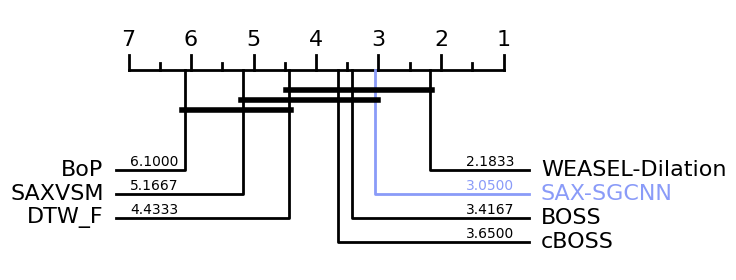

In [6]:
plot = plot_critical_difference(matrix_db_acc, classifiers_db, clique_method="holm", highlight={"SAX-SGCNN": "#8a9bf8"})
plot.show()

## Comparison to Non Dictionary-Based Methods

In [140]:
# Non-Dictionary-Based Algoritms

classifiers_ndb = ["TSF","RISE","STC","ProximityForest","InceptionTime","Catch22","TS_CHIEF","HC1","ROCKET","RSTSF","SAX-SGCNN"]
# matrix ndb acc
matrix_ndb_acc = np.concatenate((pd.read_excel("non-dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
                                df1['Acc'].values.reshape(-1,1)), axis=1)
matrix_ndb_acc.shape


(30, 11)

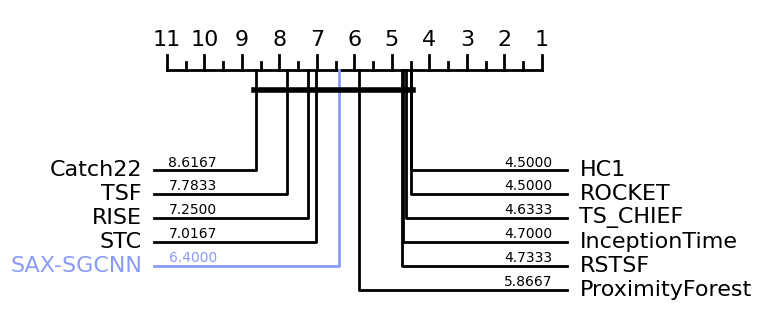

In [141]:
# plot
plot = plot_critical_difference(matrix_ndb_acc, classifiers_ndb, clique_method="holm", highlight={"SAX-SGCNN": "#8a9bf8"})
plot.show()

## Create Scatter Plot  

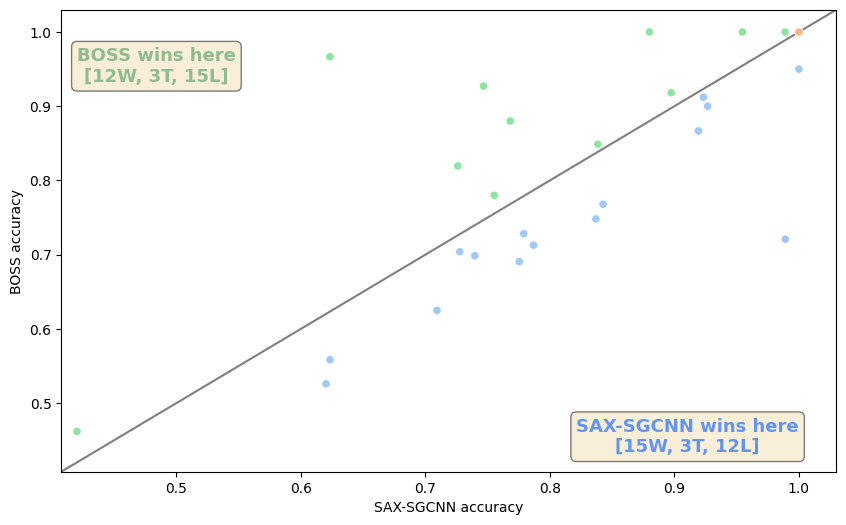

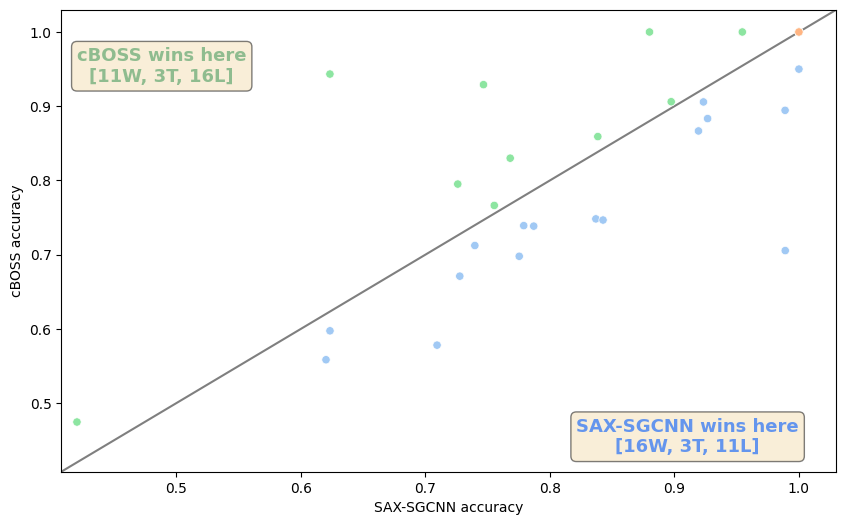

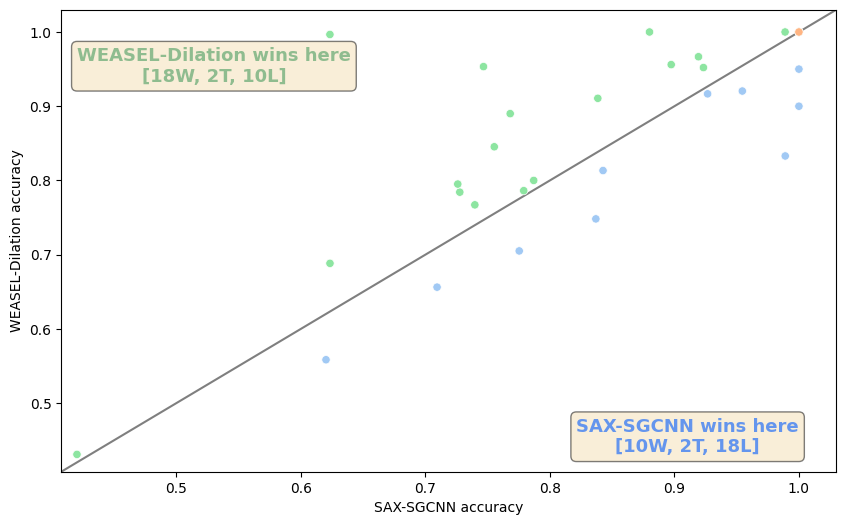

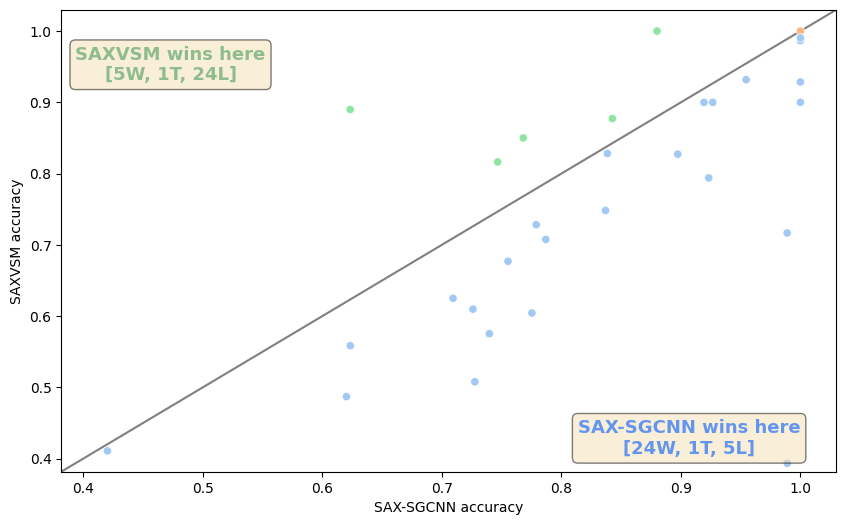

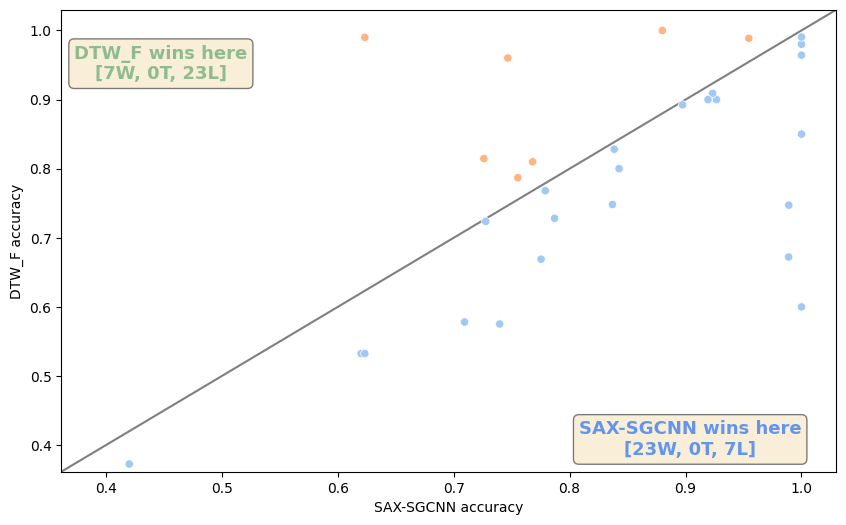

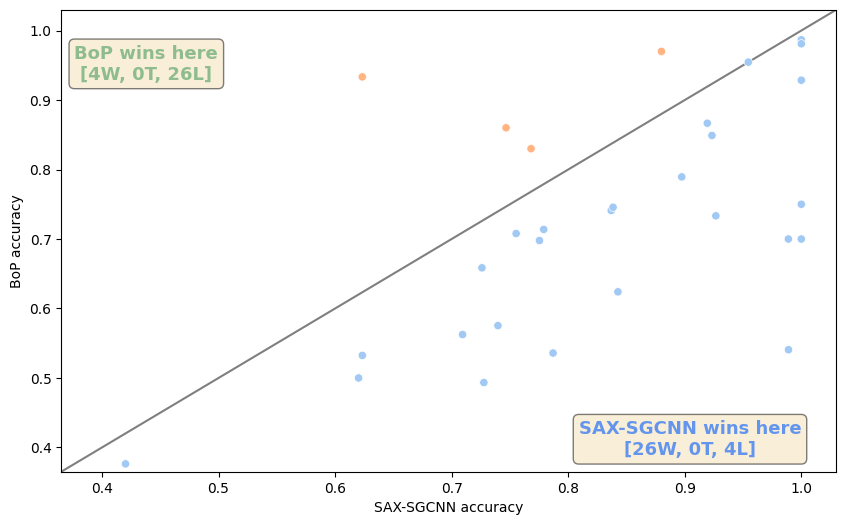

In [57]:
from PIL import Image

classifiers_db = ["BOSS","cBOSS","WEASEL-Dilation","SAXVSM","DTW_F","BoP","SAX-SGCNN"]

for n in range(6):
    plt = plot_scatter(np.dstack((matrix_db_acc[:,n],matrix_db_acc[:,-1]))[0],
                        classifiers_db[n], classifiers_db[-1])
    plt.savefig(f'images/image_{n}', bbox_inches='tight', dpi=800)

def combine_images(columns, space, images):
    rows = len(images) // columns
    if len(images) % columns:
        rows += 1
    width_max = max([Image.open(image).width for image in images])
    height_max = max([Image.open(image).height for image in images])
    background_width = width_max*columns + (space*columns)-space
    background_height = height_max*rows + (space*rows)-space
    background = Image.new('RGBA', (background_width, background_height), (255, 255, 255, 255))
    x = 0
    y = 0
    for i, image in enumerate(images):
        img = Image.open(image)
        x_offset = int((width_max-img.width)/2)
        y_offset = int((height_max-img.height)/2)
        background.paste(img, (x+x_offset, y+y_offset))
        x += width_max + space
        if (i+1) % columns == 0:
            y += height_max + space
            x = 0
    background.save('images/comparison_scatter.png', dpi=(600,600))


combine_images(columns=2, space=1, images=['images/image_0.png','images/image_1.png', 
                                            'images/image_2.png', 'images/image_3.png', 
                                            'images/image_4.png', 'images/image_5.png'])

In [8]:
methods = ["InceptionTimeClassifier", "WEASEL-Dilation"]

# results = get_estimator_results_as_array(estimators=methods)

plot = plot_scatter(
    np.concatenate(matrix_db_acc[:,0],matrix_db_acc[:,-1]),
    methods[0],
    methods[1],
    title="Comparison of IT and WEASEL2",
)
plot.show()

fig, axs = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(7, 10), dpi=1200)
# cbar_ax = fig.add_axes([.91, .3, .02, .4])
s = 0
for i in range(3):
    for j in range(2):

fig.show()

## Create Boxplot

In [1]:
# # matrix db + ndb + our acc 
# classifiers = ["TSF","RISE","STC","ProximityForest","InceptionTime","Catch22","TS_CHIEF","HC1","ROCKET","RSTSF",
#                "BOSS","cBOSS","WEASEL-Dilation","SAXVSM","DTW_F","BoP","SAX-SGCNN"]
# matrix_acc = np.concatenate((pd.read_excel("non-dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
#                              pd.read_excel("dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
#                              df1['Acc'].values.reshape(-1,1)), axis=1)

# plot = plot_boxplot_median(matrix_acc, classifiers, plot_type="boxplot",outliers=True)
# plot.show()

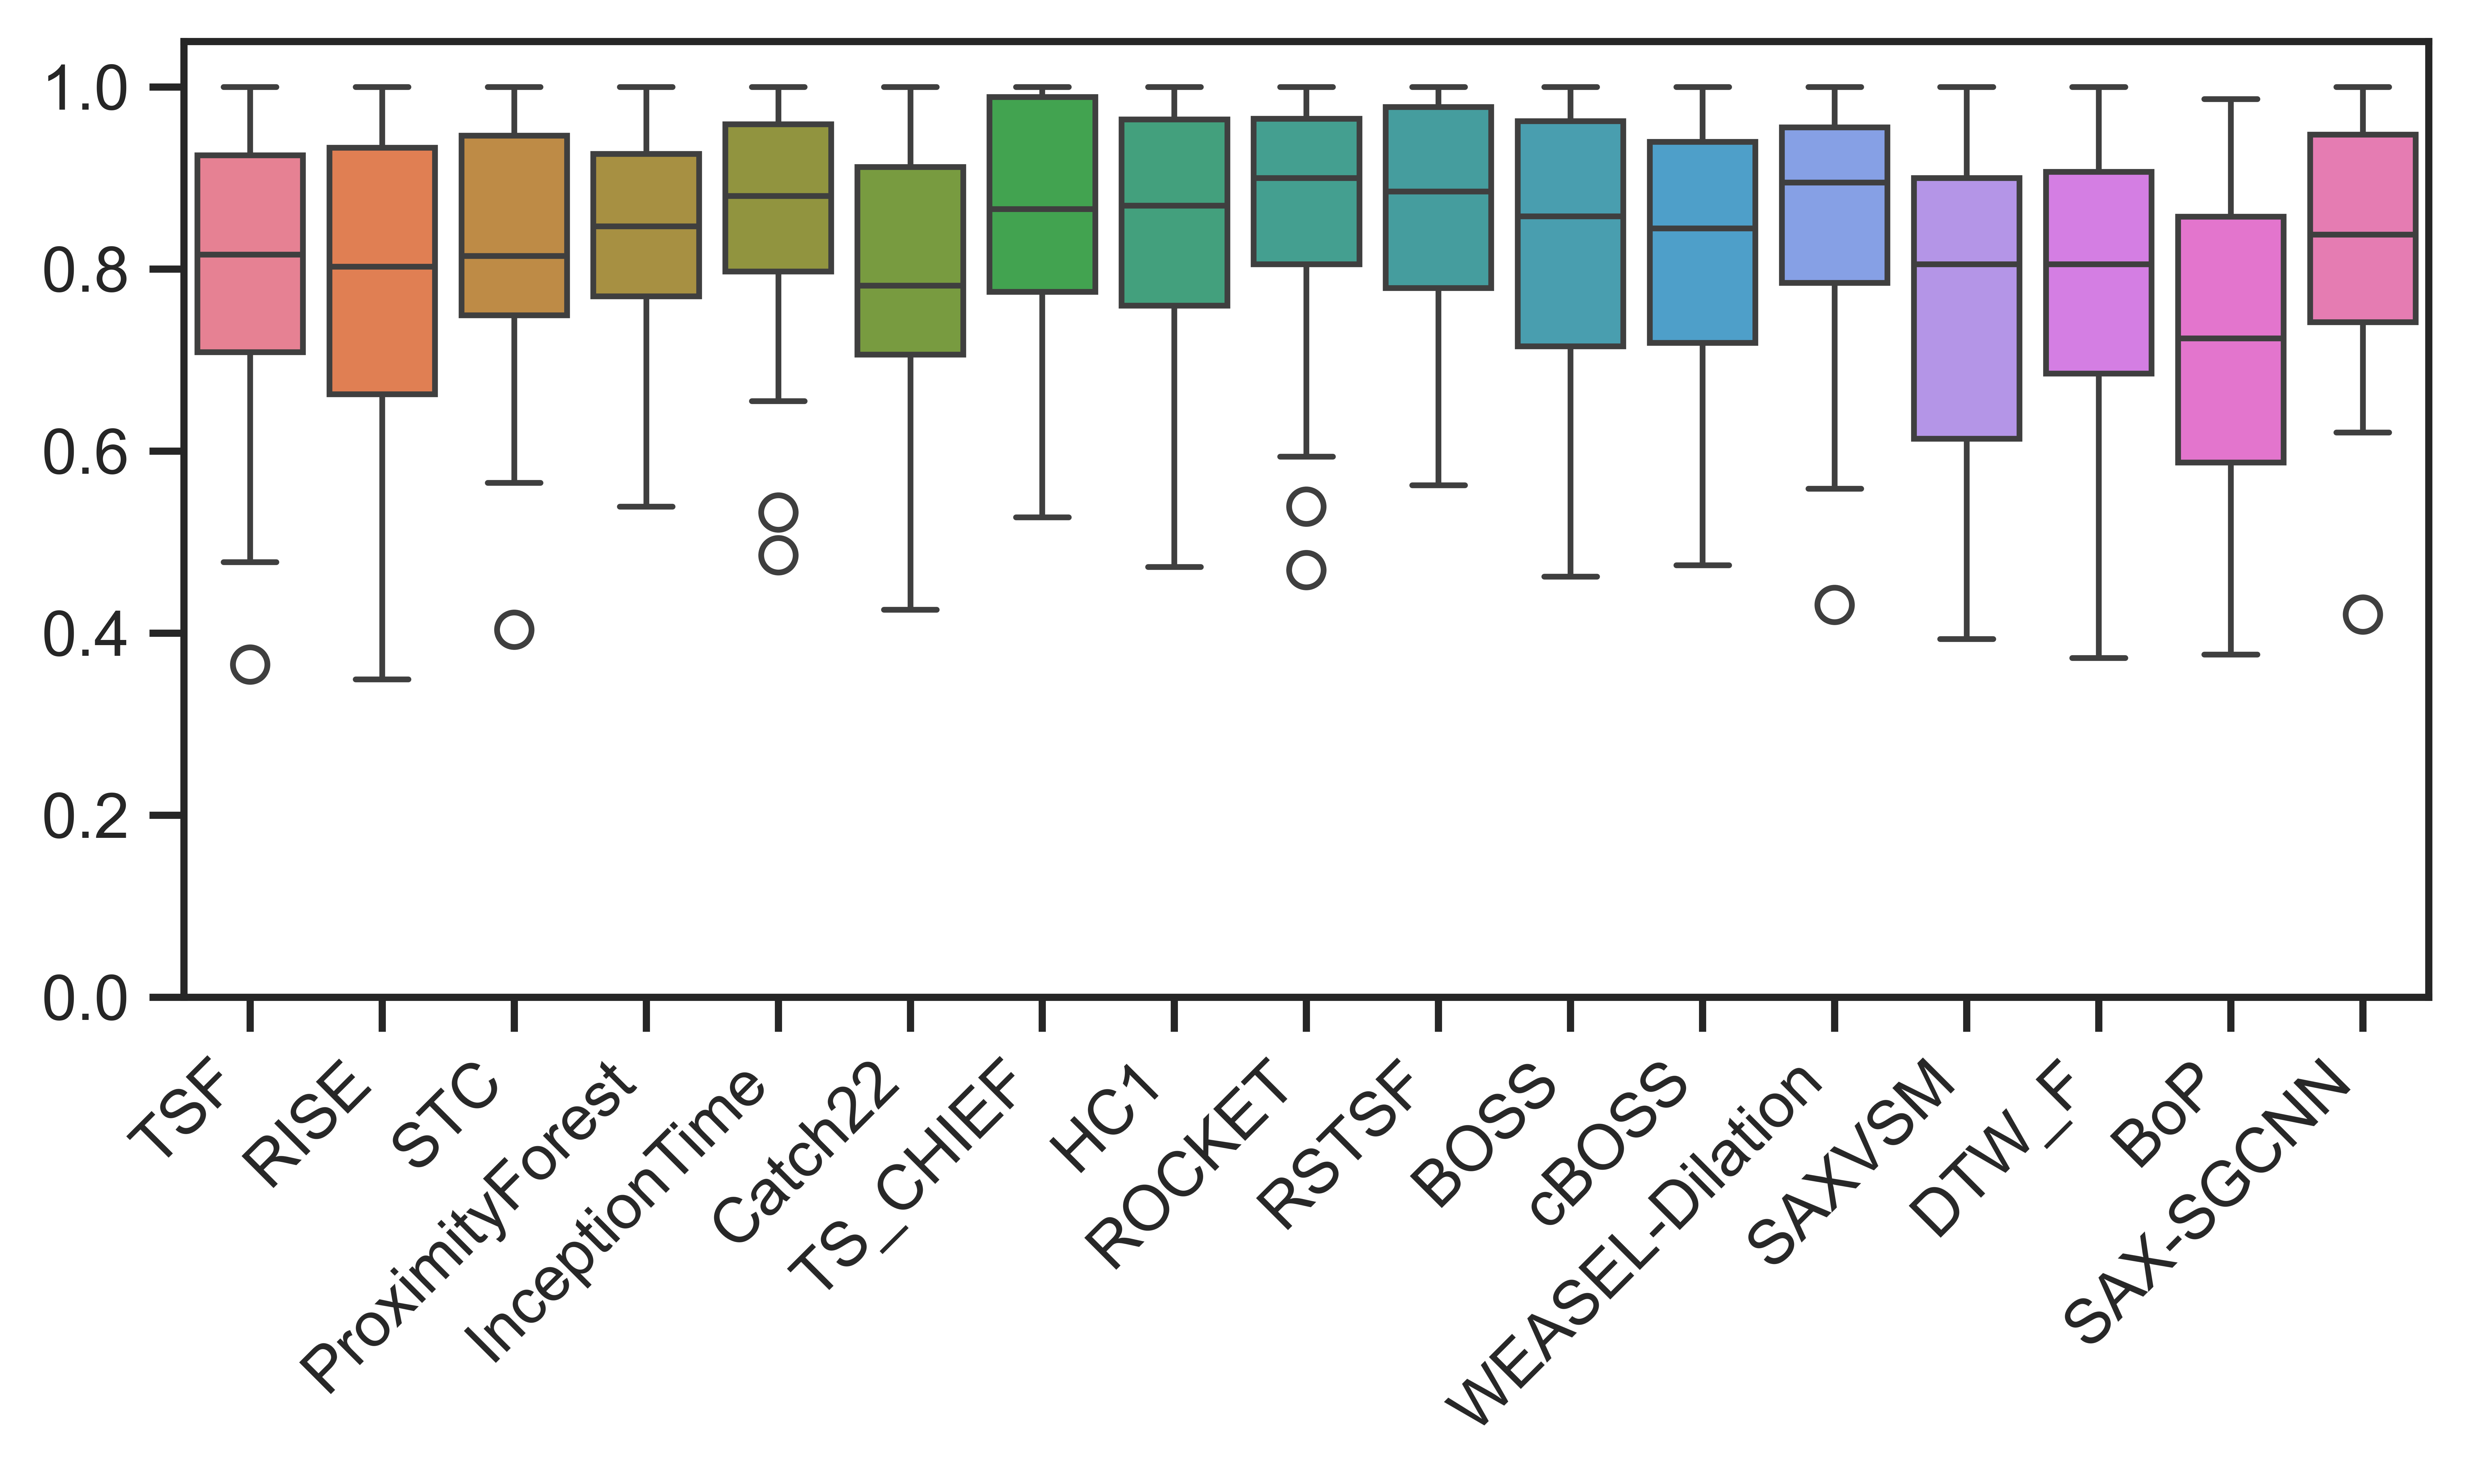

In [79]:
# matrix db + ndb + our acc 
sns.set(style="ticks")

classifiers = ["TSF","RISE","STC","ProximityForest","InceptionTime","Catch22","TS_CHIEF","HC1","ROCKET","RSTSF",
               "BOSS","cBOSS","WEASEL-Dilation","SAXVSM","DTW_F","BoP","SAX-SGCNN"]
matrix_acc = np.concatenate((pd.read_excel("non-dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
                             pd.read_excel("dictionary-based.xlsx", sheet_name="Sheet1").iloc[:,1:].to_numpy(),
                             df1['Acc'].values.reshape(-1,1)), axis=1)
df_matrix_acc = pd.DataFrame(matrix_acc, columns = classifiers)

# depict visualization
fig = plt.subplots(figsize=(7, 3), dpi=1200)
sns.set_palette(sns.color_palette("husl", 17))
gfg = sns.boxplot(data=df_matrix_acc)
gfg.set_ylim(0.0, 1.05)
gfg.set_xticklabels(gfg.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')
plt.show()